# 1.0 About Author
Project: Deaths In Palestine


Author:Zain Shah

​
Code Submission Date: 14-07-2024

​
Email:zainshah.5109@gmail.com

​
linkdn: www.linkedin.com/in/syed-zayn-shah-naqvi-a2a7772a2

​
Github:Syed-Zayn








# 1.1 About this Dataset

## Some Task Ideas:

#### Analyze Fatality Trends:

 Explore the dataset and track the trends in fatalities over time. Identify any significant changes, spikes, or declines in the number of fatalities.
##### Demographic Analysis:

Conduct a demographic analysis by examining the age, gender, and citizenship of the individuals killed. Determine if there are any notable patterns or disparities in the data.

#### Geospatial Analysis: 
Utilize the event location, district, and region information to perform geospatial analysis. Visualize the distribution of fatalities on a map and identify areas that have experienced higher levels of violence.

#### Hostilities Participation Analysis:
Investigate the extent of individuals' participation in hostilities before their deaths. Analyze the relationship between participation and the circumstances surrounding each fatality.

#### Injury Analysis: 
Examine the types of injuries inflicted on individuals. Identify the most common types of injuries and assess their severity.

#### Weapons Used: 
Analyze the ammunition and means by which the individuals were killed. Determine the most frequently used weapons or methods and evaluate their impact.

#### Victim Profiles: 
Create profiles of the victims based on the available data such as age, gender, citizenship, and place of residence. Identify common characteristics among the victims.

# (1) importing librarires

In [103]:
import datetime as de
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

### Seting max option to display max numbers of rows and cols 
### Warning filter to ignore warnings

In [2]:
# set options to be maximum for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# hide all warnings
warnings.filterwarnings('ignore') 

# (2) Reading File

In [3]:
df=pd.read_csv('fatalities_isr_pse_conflict_2000_to_2023.csv')

# (3) Exploring Data

In [4]:
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [6]:
df.describe()

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


# (4) Data Cleaning

### Checking for null values

In [7]:
df.isnull().sum()

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

In [8]:
df.isnull().sum()/len(df)*100

name                             0.000000
date_of_event                    0.000000
age                              1.159655
citizenship                      0.000000
event_location                   0.000000
event_location_district          0.000000
event_location_region            0.000000
date_of_death                    0.000000
gender                           0.179791
took_part_in_the_hostilities    12.855088
place_of_residence               0.611291
place_of_residence_district      0.611291
type_of_injury                   2.615965
ammunition                      47.222222
killed_by                        0.000000
notes                            2.517080
dtype: float64

### Filing Null values of age by its mean

In [9]:
df['age']=df['age'].replace(np.nan,df['age'].mean())

In [10]:
df.isnull().sum()

name                               0
date_of_event                      0
age                                0
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

In [11]:
df['ammunition'].unique()

array(['live ammunition', 'missile', nan, 'rocket',
       '0.22-caliber bullets', 'bomb', 'knife', 'shell', 'rock',
       'rubber-coated metal bullets', 'stun grenade', 'teargas canister',
       'flare bomb', 'sponge rounds', 'mortar fire', 'grad rocket',
       'flechette shells', 'phosphorus shell', 'Qassam rocket',
       'explosive belt', 'grenade', 'car bomb'], dtype=object)

In [12]:
df['killed_by'].unique()

array(['Israeli security forces', 'Palestinian civilians',
       'Israeli civilians'], dtype=object)

### convert date_of_event and date_of_death to datetime and checking corelation b/w them

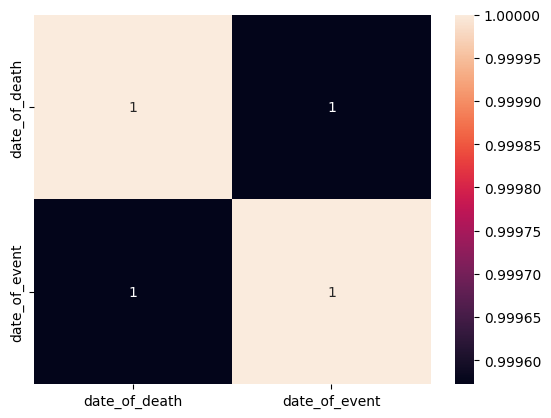

In [12]:
df['date_of_event']=pd.to_datetime(df['date_of_event'],errors='coerce')
df['date_of_death']=pd.to_datetime(df['date_of_death'],errors='coerce')
cor=df[['date_of_death','date_of_event']].corr()
sns.heatmap(cor,annot=True)
plt.show()

In [13]:
df.describe()

,date_of_event,age,date_of_death
count,11124,11124.000000,11124
mean,2009-10-31 01:25:18.446601984,26.745703,2009-11-03 00:32:06.213592320
min,2000-10-02 00:00:00,1.000000,2000-10-02 00:00:00
25%,2004-05-18 00:00:00,19.000000,2004-05-18 00:00:00
50%,2008-12-29 00:00:00,23.000000,2008-12-29 00:00:00
75%,2014-07-26 00:00:00,31.000000,2014-07-26 00:00:00
max,2023-09-24 00:00:00,112.000000,2023-09-24 00:00:00
std,NaN,13.700404,NaN


### creating new columns from date_of_event

In [14]:
df['Day of death']=df['date_of_event'].dt.day
df['Month of death']=df['date_of_event'].dt.month
df['Year of death']=df['date_of_event'].dt.year


In [15]:
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes,Day of death,Month of death,Year of death
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...,24,9,2023
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...,24,9,2023
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...,22,9,2023
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...,20,9,2023
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...,19,9,2023


# droping columns which are not required and are corelated with each other

In [16]:
df.drop(columns=['date_of_event'],inplace=True)

In [17]:
df.drop(columns=['date_of_death'],inplace=True)

In [18]:
df.head()

,name,age,citizenship,event_location,event_location_district,event_location_region,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes,Day of death,Month of death,Year of death
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...,24,9,2023
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...,24,9,2023
2,'Abdallah 'Imad Sa'ed Abu Hassan,16.0,Palestinian,Kfar Dan,Jenin,West Bank,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...,22,9,2023
3,Durgham Muhammad Yihya al-Akhras,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...,20,9,2023
4,Raafat 'Omar Ahmad Khamaisah,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...,19,9,2023


### data cleaning of gender column 

In [19]:
df['gender']=df['gender'].apply(lambda x: x.replace('M','MALE') if pd.notnull(x) else x)

In [20]:
df['gender']=df['gender'].apply(lambda x: x.replace('F','FEMALE') if pd.notnull(x) else x)

In [21]:
df.head()

,name,age,citizenship,event_location,event_location_district,event_location_region,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes,Day of death,Month of death,Year of death
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,MALE,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...,24,9,2023
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,MALE,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...,24,9,2023
2,'Abdallah 'Imad Sa'ed Abu Hassan,16.0,Palestinian,Kfar Dan,Jenin,West Bank,MALE,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...,22,9,2023
3,Durgham Muhammad Yihya al-Akhras,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,MALE,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...,20,9,2023
4,Raafat 'Omar Ahmad Khamaisah,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,MALE,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...,19,9,2023


In [22]:
df['gender'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [23]:
df.isnull().sum()

name                               0
age                                0
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
Day of death                       0
Month of death                     0
Year of death                      0
dtype: int64

### creating age stages based on age

In [24]:
bins=[0,5,12,18,30,60,112.0]
labels=['Baby','Children','Teen','Young','Mature','Old']
df['Age Stages']=pd.cut(df['age'],bins=bins,labels=labels)
df['age'].min()

1.0

In [25]:
df.head()

,name,age,citizenship,event_location,event_location_district,event_location_region,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes,Day of death,Month of death,Year of death,Age Stages
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,MALE,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...,24,9,2023,Mature
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,MALE,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...,24,9,2023,Young
2,'Abdallah 'Imad Sa'ed Abu Hassan,16.0,Palestinian,Kfar Dan,Jenin,West Bank,MALE,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...,22,9,2023,Teen
3,Durgham Muhammad Yihya al-Akhras,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,MALE,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...,20,9,2023,Young
4,Raafat 'Omar Ahmad Khamaisah,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,MALE,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...,19,9,2023,Teen


### filling missing values with mode values in gender 

In [26]:
df['gender']=df['gender'].replace(np.nan,df['gender'].mode()[0])

In [27]:
df.isnull().sum()/len(df)*100

name                             0.000000
age                              0.000000
citizenship                      0.000000
event_location                   0.000000
event_location_district          0.000000
event_location_region            0.000000
gender                           0.000000
took_part_in_the_hostilities    12.855088
place_of_residence               0.611291
place_of_residence_district      0.611291
type_of_injury                   2.615965
ammunition                      47.222222
killed_by                        0.000000
notes                            2.517080
Day of death                     0.000000
Month of death                   0.000000
Year of death                    0.000000
Age Stages                       0.000000
dtype: float64

### droping the column 'ammunition' as it has 47% missing values

In [28]:
df.drop(columns='ammunition',inplace=True)

In [29]:
df.columns 

Index(['name', 'age', 'citizenship', 'event_location',
       'event_location_district', 'event_location_region', 'gender',
       'took_part_in_the_hostilities', 'place_of_residence',
       'place_of_residence_district', 'type_of_injury', 'killed_by', 'notes',
       'Day of death', 'Month of death', 'Year of death', 'Age Stages'],
      dtype='object')

In [30]:
df.isnull().sum()

name                               0
age                                0
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
gender                             0
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
killed_by                          0
notes                            280
Day of death                       0
Month of death                     0
Year of death                      0
Age Stages                         0
dtype: int64

In [76]:
df.sample(5)

,name,age,citizenship,event_location,event_location_district,event_location_region,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,killed_by,notes,Day of death,Month of death,Year of death,Age Stages
8355,Muhammad (Suliman) Muhammad 'Abdallah Hamed,20.0,Palestinian,Silwad,Ramallah and al-Bira,West Bank,MALE,No,Silwad R.C.,Ramallah and al-Bira,gunfire,Israeli security forces,Killed when he was shot in the head when the I...,17,5,2004,Young
8860,Shehdeh Yusef Salim a-Diri,32.0,Palestinian,Gaza City,Gaza,Gaza Strip,MALE,No,Gaza city,Gaza,gunfire,Israeli security forces,Killed during an assassination attempt on the ...,10,9,2003,Mature
5246,'Alaa Ibrahim Salamah Matar,23.0,Palestinian,Gaza City,Gaza,Gaza Strip,MALE,No,Gaza city,Gaza,gunfire,Israeli security forces,Killed next to his house with his cousin Ahmad...,5,1,2009,Young
776,Muhammad Hussein Muhammad 'Amru,35.0,Palestinian,Gush Etzion,Bethlehem,West Bank,MALE,No,Halhul,Hebron,gunfire,Israeli security forces,Fatally shot by a soldier near a bus station a...,31,1,2021,Mature
11020,Yehezkel Mu'alem,49.0,Israeli,Kiryat Arba,Hebron,West Bank,MALE,Israelis,Kiryat Arba,Hebron,gunfire,Palestinian civilians,Killed when Palestinians opened fire at an IDF...,13,7,2001,Mature


### replacing missing values with mode values of the column gender

In [32]:
df['gender'].replace(np.nan,df['gender'].mode()[0],inplace=True)

### took_part_in_the_hostilities which are yes, no, unknown

In [36]:
a=df['took_part_in_the_hostilities']=='Yes'
df[a].groupby('Age Stages').size()

Age Stages
Baby           0
Children       0
Teen         289
Young       2665
Mature       510
Old            3
dtype: int64

In [37]:
a=df['took_part_in_the_hostilities']=='No'
df[a].groupby('Age Stages').size()

Age Stages
Baby         285
Children     475
Teen        1080
Young       1387
Mature      1177
Old          249
dtype: int64

In [70]:
a=df['took_part_in_the_hostilities']=='Unknown'
df[a].groupby('Age Stages').size()

Age Stages
Baby          0
Children      0
Teen         72
Young       398
Mature      131
Old           0
dtype: int64

### replacing missing values in took_part_in_the_hostilities column with 'No' if the Age Stages is 'Children'

In [49]:
df.loc[(df['Age Stages'] == 'Children') & (df['took_part_in_the_hostilities'].isna()), 'took_part_in_the_hostilities'] = 'No'

### ### replacing missing values in took_part_in_the_hostilities column with 'No' if the Age Stages is 'Baby'

In [39]:
df.loc[(df['Age Stages'] == 'Baby') & (df['took_part_in_the_hostilities'].isna()), 'took_part_in_the_hostilities'] = 'No'

### replacing missing values in took_part_in_the_hostilities column with 'No' if the Age Stages is 'Old'

In [40]:
df.loc[(df['Age Stages'] == 'Old') & (df['took_part_in_the_hostilities'].isna()), 'took_part_in_the_hostilities'] = 'No'

### replacing missing values in took_part_in_the_hostilities column with 'Mode value' if the Age Stages is 'Young'

In [54]:
mode_value = df['took_part_in_the_hostilities'].mode()[0]
df.loc[(df['Age Stages'] == 'Young') & (df['took_part_in_the_hostilities'].isna()), 'took_part_in_the_hostilities'] = mode_value

### replacing missing values in took_part_in_the_hostilities column with 'Mode' if the Age Stages is 'Teen'

In [55]:
df.loc[(df['Age Stages'] == 'Teen') & (df['took_part_in_the_hostilities'].isna()), 'took_part_in_the_hostilities'] = mode_value

### replacing missing values in took_part_in_the_hostilities column with 'Mode' if the Age Stages is 'Mature'

In [56]:
df.loc[(df['Age Stages'] == 'Mature') & (df['took_part_in_the_hostilities'].isna()), 'took_part_in_the_hostilities'] = mode_value

In [61]:
df.loc[(df['Age Stages'] == 'Young') & (df['took_part_in_the_hostilities'].isna()), 'took_part_in_the_hostilities'] = mode_value

# filling the remaining unknown values with mode

In [62]:
df['took_part_in_the_hostilities'] = df['took_part_in_the_hostilities'].fillna(mode_value)

In [59]:
a=df['took_part_in_the_hostilities']=='No'
df[a].groupby('Age Stages').size()

Age Stages
Baby         285
Children     482
Teen        1365
Young       2152
Mature      1514
Old          249
dtype: int64

In [63]:
df.isnull().sum()

name                              0
age                               0
citizenship                       0
event_location                    0
event_location_district           0
event_location_region             0
gender                            0
took_part_in_the_hostilities      0
place_of_residence               68
place_of_residence_district      68
type_of_injury                  291
killed_by                         0
notes                           280
Day of death                      0
Month of death                    0
Year of death                     0
Age Stages                        0
dtype: int64

In [225]:
df['citizenship'].unique()

array(['Palestinian', 'Israeli', 'Jordanian', 'American'], dtype=object)

### filing the missing values in place of residence column with mode values which are in Palestine


In [66]:
mode_value = df['place_of_residence'].mode()[0]
df.loc[(df['citizenship'] == 'Palestinian') & (df['place_of_residence'].isna()), 'place_of_residence'] = mode_value

### filling the missing values in place of residence with Israeli Location

In [77]:
value = 'Kiryat Arba'
df.loc[(df['citizenship'] == 'Israeli') & (df['place_of_residence'].isna()), 'place_of_residence'] = value

### fill with mode value for Jordanian citizenship 

In [ ]:
value = 'Kiryat Arba'
df.loc[(df['citizenship'] == 'Joranian') & (df['place_of_residence'].isna()), 'place_of_residence'] = value

### fill with mode value for Palestine in  place_of_residence_district column

In [82]:
mode_value = df['place_of_residence_district'].mode()[0]
df.loc[(df['citizenship'] == 'Palestinian') & (df['place_of_residence_district'].isna()), 'place_of_residence_district'] = mode_value

### fill with mode of Israel

In [83]:
mode_value ='Hebron'
df.loc[(df['citizenship'] == 'Israeli') & (df['place_of_residence_district'].isna()), 'place_of_residence_district'] = mode_value

### fill the missing values with Unknown in type of injury column bcz we dont know the type of injury

In [85]:
df['type_of_injury']=df['type_of_injury'].fillna('Unknown')

### fill the missing values with Unknown in notes column bcz we dont know notes

In [87]:
df['notes']=df['notes'].fillna('Unknown')

In [89]:
df.isnull().sum()

name                            0
age                             0
citizenship                     0
event_location                  0
event_location_district         0
event_location_region           0
gender                          0
took_part_in_the_hostilities    0
place_of_residence              0
place_of_residence_district     0
type_of_injury                  0
killed_by                       0
notes                           0
Day of death                    0
Month of death                  0
Year of death                   0
Age Stages                      0
dtype: int64

### creating month name column from month of death

In [105]:
df['Month Name']=df['Month of death'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [107]:
df.sample(5)

,name,age,citizenship,event_location,event_location_district,event_location_region,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,killed_by,notes,Day of death,Month of death,Year of death,Age Stages,Month Name
9613,Ahmad Saleh Isma'il 'Eid,42.0,Palestinian,Git,Nablus,West Bank,MALE,No,Jinsafut,Qalqiliya,gunfire,Israeli security forces,Hit by gunfire when he circumvented a checkpoi...,7,10,2002,Mature,October
10310,Yitzhak Kanner,81.0,Israeli,Elon Moreh,Nablus,West Bank,MALE,Israelis,Elon Moreh,Nablus,gunfire,Palestinian civilians,Shot by a Palestinian who infiltrated the fami...,28,3,2002,Old,March
10113,Nader al-Khader,28.0,Palestinian,Yatta,Hebron,West Bank,MALE,Yes,Yatta,Hebron,gunfire,Israeli security forces,Killed during an exchange of fire.,6,4,2002,Young,April
8429,Musa Ibrahim Talab al-Muqayed,14.0,Palestinian,Beit Lahiya,North Gaza,Gaza Strip,MALE,No,Jabalya R.C.,North Gaza,gunfire,Israeli security forces,Shot and killed while playing with his friends...,26,4,2004,Teen,April
5230,Ibrahim Mu'in al-'Abed Juha,14.0,Palestinian,Gaza City,Gaza,Gaza Strip,MALE,No,Gaza city,Gaza,gunfire,Israeli security forces,Killed when he left his house with his family ...,5,1,2009,Teen,January


# (6) NOW GENERATTING SOME QUESTIONS About Palestine
Because Palestine has the most number of death in this data about (95 %) and israel is the main reason of terrorism in Palestine, Israli Kill Palestinians WithOut any reason and palestinians kill israelis for their defend which is the right of every person


### which citizenship has the most deaths

In [90]:
df.groupby('citizenship').size()

citizenship
American           1
Israeli         1029
Jordanian          2
Palestinian    10092
dtype: int64

### Display top 5 deaths in a day of palestines


In [98]:
a=df['citizenship']=='Palestinian'
df[a].groupby('Day of death').size().sort_values(ascending=False).head(5)

Day of death
27    536
1     526
20    482
4     426
29    381
dtype: int64

### Display top 5 deaths in a  year of palestines

In [100]:
df[a].groupby('Year of death').size().sort_values(ascending=False).head(5)

Year of death
2014    2272
2009    1036
2002    1034
2008     885
2004     829
dtype: int64

### Display top 5 deaths in a  month of palestines

In [109]:
df[a].groupby('Month Name').size().sort_values(ascending=False).head(5)

Month Name
July        2081
January     1373
August       996
December     901
May          841
dtype: int64

### which citizenship has the low age deaths (using plot)

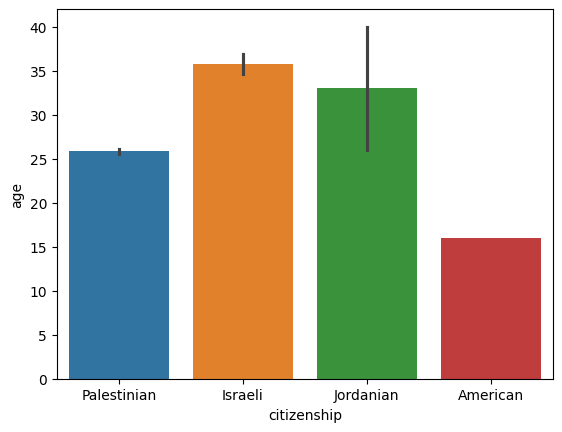

In [123]:
sns.barplot(x='citizenship',y='age',data=df,hue='citizenship')
plt.show()

### Number of females and males death in palestine

In [130]:
b=df[a].groupby('gender').size()

gender
FEMALE    1091
MALE      9001
dtype: int64

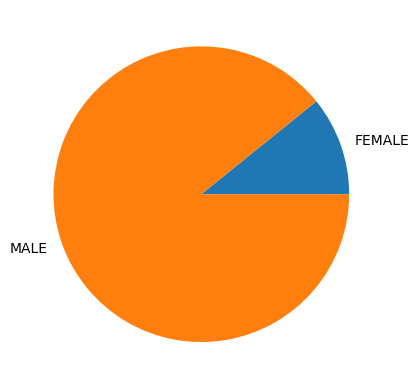

In [136]:
b=df[a].groupby('gender').size()
plt.pie(b,labels=b.index)
plt.show()

### Deaths of Palestinians in each year

In [172]:
c=df[a].groupby('Year of death').size()
c.sort_values(ascending=False).head(5)

Year of death
2014    2272
2009    1036
2002    1034
2008     885
2004     829
dtype: int64

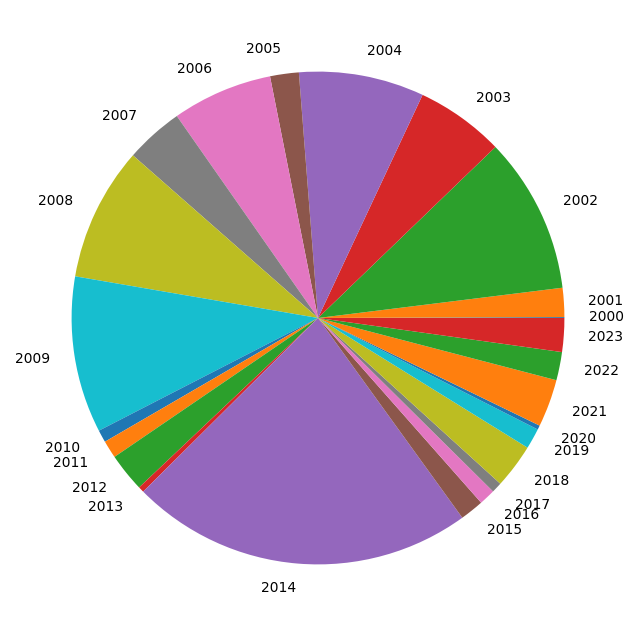

In [165]:
plt.figure(figsize=(16,8))
plt.pie(c,labels=c.index)
plt.show()

### Deaths of Palestinians on the basis of Age stages

In [148]:
df[a].groupby('Age Stages').size()

Age Stages
Baby         287
Children     481
Teen        1704
Young       5234
Mature      2125
Old          261
dtype: int64

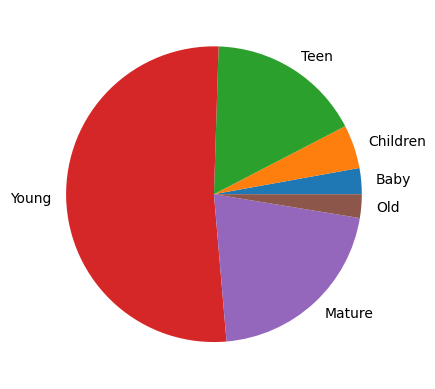

In [154]:
b=df[a].groupby('Age Stages').size()
plt.pie(b,labels=b.index)
plt.show()

### Palestinians People Deatils

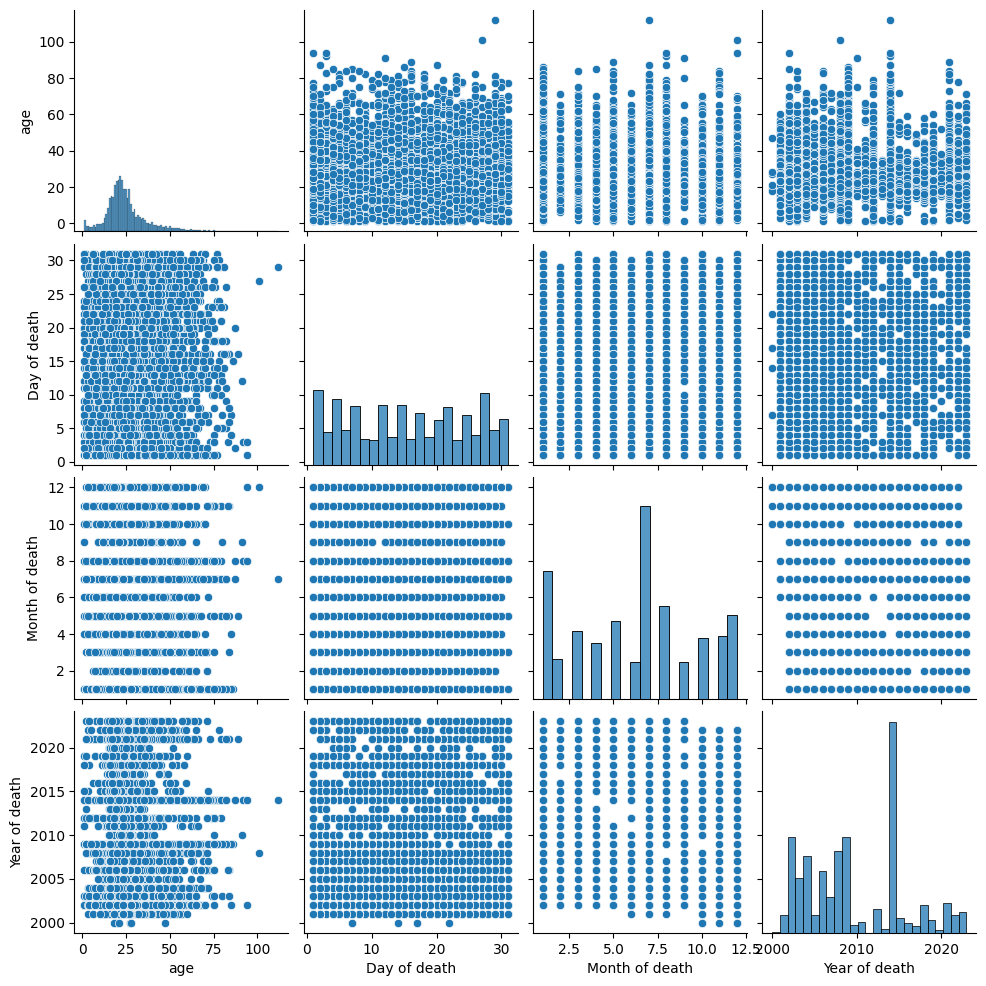

In [167]:
sns.pairplot(df[a])
plt.show()

### who killed the palestinians most

In [173]:
df[a].groupby('killed_by').size()

killed_by
Israeli civilians            96
Israeli security forces    9996
dtype: int64

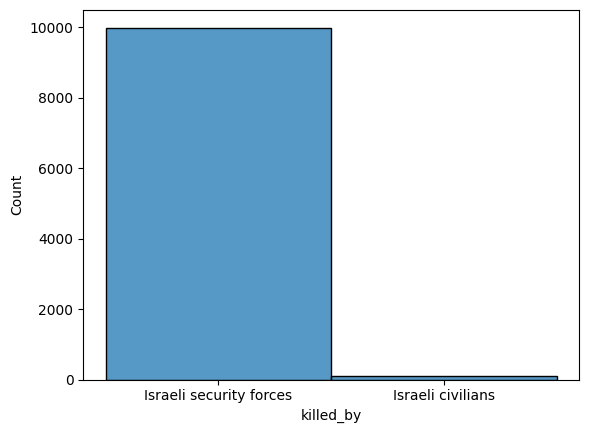

In [175]:
sns.histplot(df[a]['killed_by'])
plt.show()

In [176]:
df.head()

,name,age,citizenship,event_location,event_location_district,event_location_region,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,killed_by,notes,Day of death,Month of death,Year of death,Age Stages,Month Name
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,MALE,No,Nur Shams R.C.,Tulkarm,gunfire,Israeli security forces,Fatally shot by Israeli forces while standing ...,24,9,2023,Mature,September
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,MALE,No,Nur Shams R.C.,Tulkarm,gunfire,Israeli security forces,Fatally shot by Israeli forces while trying to...,24,9,2023,Young,September
2,'Abdallah 'Imad Sa'ed Abu Hassan,16.0,Palestinian,Kfar Dan,Jenin,West Bank,MALE,No,al-Yamun,Jenin,gunfire,Israeli security forces,Fatally shot by soldiers while firing at them ...,22,9,2023,Teen,September
3,Durgham Muhammad Yihya al-Akhras,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,MALE,No,'Aqbat Jaber R.C.,Jericho,gunfire,Israeli security forces,Shot in the head by Israeli forces while throw...,20,9,2023,Young,September
4,Raafat 'Omar Ahmad Khamaisah,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,MALE,No,Jenin,Jenin,gunfire,Israeli security forces,Wounded by soldiers’ gunfire after running awa...,19,9,2023,Teen,September


### which event_location_district has the highest number of deaths top 5 (only palestine)

In [188]:
d=df[a].groupby('event_location_district').size().sort_values(ascending=False).head(5)
d

event_location_district
Gaza             2400
North Gaza       1872
Khan Yunis       1352
Rafah            1041
Deir al-Balah     831
dtype: int64

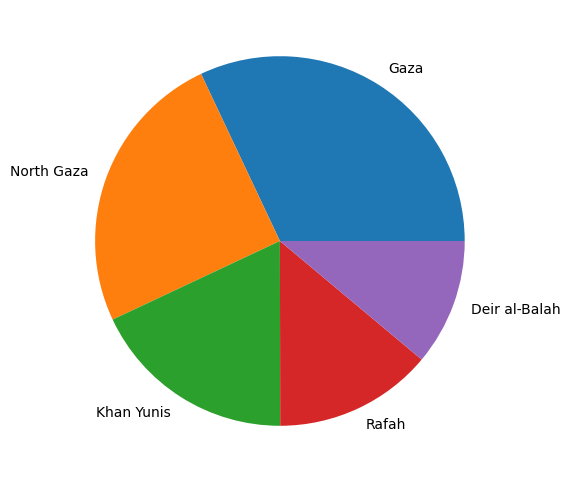

In [189]:
plt.figure(figsize=(16,6))
plt.pie(d,labels=d.index)
plt.show( )

### who has took_part_in_the_hostilities more in palestine

In [192]:
df[a].groupby(['Age Stages','took_part_in_the_hostilities']).size()

Age Stages  took_part_in_the_hostilities
Baby        No                               287
            Object of targeted killing         0
            Unknown                            0
            Yes                                0
Children    No                               480
            Object of targeted killing         0
            Unknown                            1
            Yes                                0
Teen        No                              1340
            Object of targeted killing         3
            Unknown                           72
            Yes                              289
Young       No                              2048
            Object of targeted killing       123
            Unknown                          398
            Yes                             2665
Mature      No                              1412
            Object of targeted killing        73
            Unknown                          131
            Yes             

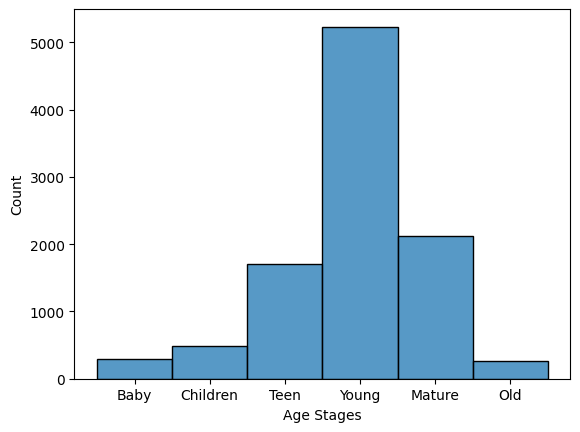

In [195]:
sns.histplot(df[a]['Age Stages'])
plt.show()

### top 5 type_of_injury to palestinians

In [203]:
f=df[a].groupby('type_of_injury').size().sort_values(ascending=False).head(5)
f

type_of_injury
gunfire             9408
shelling             311
Unknown              280
explosion             47
house demolition      25
dtype: int64

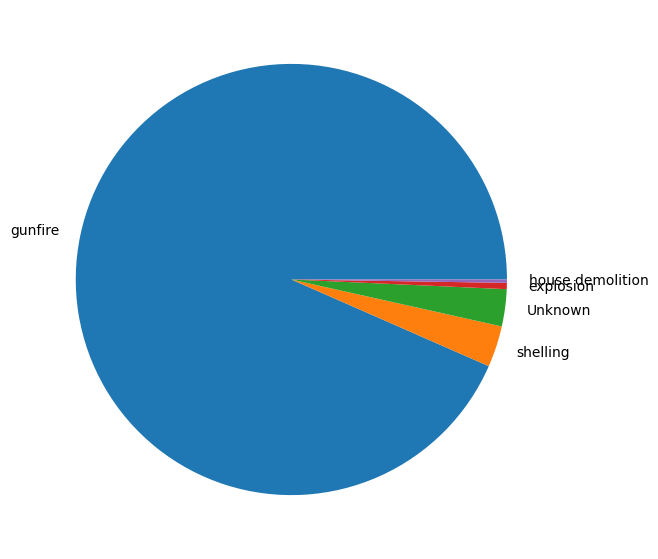

In [207]:
plt.figure(figsize=(16,7))
plt.pie(f,labels=f.index)
plt.show()

In [ ]:
df.to_csv('Palestine.csv')

# Conclusion:

Palestine has tragically borne the highest number of deaths in this dataset, accounting for a staggering 95%. The data unequivocally points to Israel as the primary instigator of terrorism in Palestine. The Israeli forces are indiscriminately taking lives, including those of innocent civilians. From newborns to the elderly, no age group has been spared from this senseless violence.

# Key Insights:

### Death Toll Across Ages:
Every demographic in Palestine has suffered losses at the hands of Israeli forces. From the youngest babies, aged just one day, to children, teens, adults, and seniors, all have fallen victim to this conflict.

### Major Culprit:
An overwhelming 96% of deaths in Palestine can be attributed to the actions of Israel's military. This dominance underscores the severe impact of their operations on civilian lives.

### Lack of Justification:
There is no justifiable reason provided for the killing of innocent Palestinians. Such acts are rightly condemned as terrorism, perpetrated by Israel.

### Final Thoughts:

Palestinians are unjustly targeted and killed without provocation. They have every right to defend themselves against unwarranted aggression. It is imperative that the global community intervenes to protect the innocent in Palestine and puts an end to the reign of terror inflicted upon them by Israel.

### In closing:
The world must unite to support the cause of innocent Palestinians and put an end to the terror inflicted upon them by Israel. Their right to self-defense against unwarranted aggression must be respected.